In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train_values = pd.read_csv('../datasets/train_values.csv')
df_train_labels = pd.read_csv('../datasets/train_labels.csv')

#### Relación entre columnas categóricas con un solo valor predominante

In [3]:
df_train_values['land_surface_condition'].value_counts(normalize='true').head(1)

t                   0.83
Name: land_surface_condition, dtype: float64

In [4]:
df_train_values['foundation_type'].value_counts(normalize='true').head(1)

r                   0.84
Name: foundation_type, dtype: float64

In [5]:
df_train_values['roof_type'].value_counts(normalize='true').head(1)

n                   0.70
Name: roof_type, dtype: float64

In [6]:
df_train_values['ground_floor_type'].value_counts(normalize='true').head(1)

f                   0.80
Name: ground_floor_type, dtype: float64

In [7]:
df_train_values['other_floor_type'].value_counts(normalize='true').head(1)

q                   0.63
Name: other_floor_type, dtype: float64

In [8]:
df_train_values['position'].value_counts(normalize='true').head(1)

s                   0.78
Name: position, dtype: float64

In [9]:
df_train_values['plan_configuration'].value_counts(normalize='true').head(1)

d                   0.96
Name: plan_configuration, dtype: float64

In [10]:
df_train_values['legal_ownership_status'].value_counts(normalize='true').head(1)

v                   0.96
Name: legal_ownership_status, dtype: float64

Los valores van desde el 63% al 96%

In [11]:
df_train_values['catego_comun']=((df_train_values['land_surface_condition']=='t') &
                                (df_train_values['foundation_type']=='r') &
                                (df_train_values['roof_type']=='n') &
                                (df_train_values['ground_floor_type']=='f') &
                                (df_train_values['other_floor_type']=='q') &
                                (df_train_values['position']=='s') &
                                (df_train_values['plan_configuration']=='d') &
                                (df_train_values['legal_ownership_status']=='v'))

In [12]:
df_train_values['catego_comun'].value_counts(normalize='true')

False                   0.76
True                    0.24
Name: catego_comun, dtype: float64

Solo el 24% de los edificios tienen igual valor en las 8 columnas.(Caracteristica común de las edificaciones)

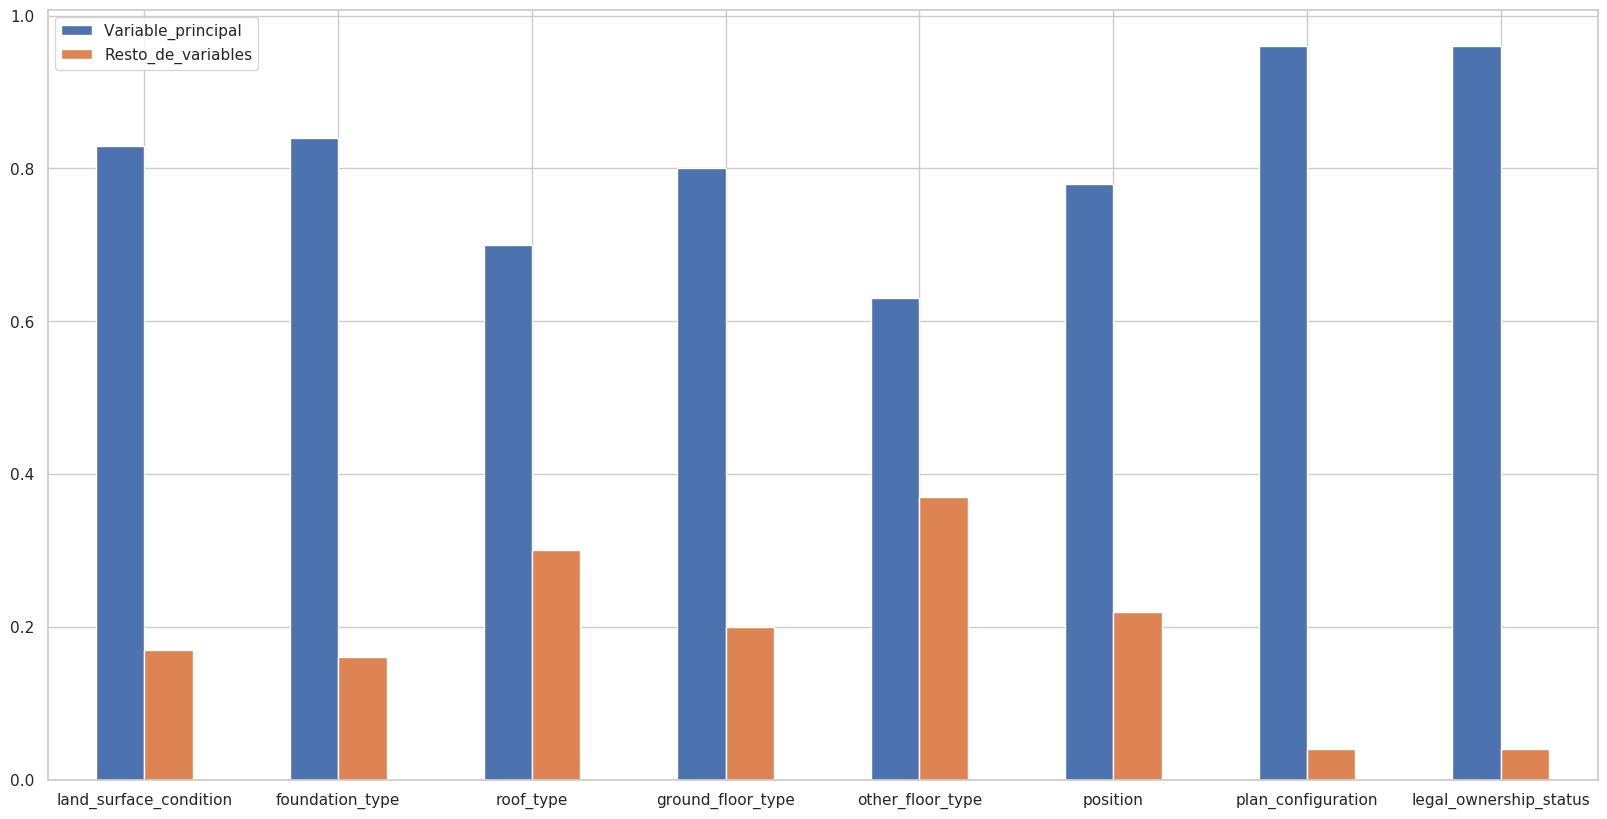

In [13]:
Variable_principal = [0.83, 0.84, 0.7, 0.8, 0.63, 0.78, 0.96,0.96]
Resto_de_variables = [0.17, 0.16, 0.3, 0.2, 0.37, 0.22, 0.04, 0.04]
index = ['land_surface_condition','foundation_type','roof_type','ground_floor_type',
         'other_floor_type','position','plan_configuration','legal_ownership_status']

df = pd.DataFrame({'Variable_principal ': Variable_principal ,
                   'Resto_de_variables': Resto_de_variables}, index=index)

ax = df.plot.bar(rot=0)